<a href="https://colab.research.google.com/github/LuluTamaturgo/Challenger_Machine_Learning_TelecomX/blob/main/Machine_Learning_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necess√°rias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o arquivo tratado no Chalenger anterior

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FormacÃßaÃÉo Data Science/Challenger: Desafios/df_tratado.csv')
dados.head()

ID_num ID_text Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0       2   orfbo    no  female              0     yes        yes       9   
1       3   mknfe    no    male              0      no         no       9   
2       4   tlhlj   yes    male              0      no         no       4   
3      11   igkff   yes    male              1     yes         no      13   
4      13   exchz   yes  female              1     yes         no       3   

  PhoneService MultipleLines  ... DeviceProtection TechSupport StreamingTV  \
0          yes            no  ...               no         yes         yes   
1          yes           yes  ...               no          no          no   
2          yes            no  ...              yes          no          no   
3          yes            no  ...              yes          no         yes   
4          yes            no  ...               no         yes         yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod Monthly  \
0              no        one year              yes      mailed check      65   
1             yes  month-to-month               no      mailed check      59   
2              no  month-to-month              yes  electronic check      73   
3             yes  month-to-month              yes  electronic check      98   
4              no  month-to-month              yes      mailed check      83   

     Total Contas_Diarias  
0   593.30           2.17  
1   542.40           1.97  
2   280.85           2.43  
3  1237.85           3.27  
4   267.40           2.77  

[5 rows x 23 columns]

# Criando uma c√≥pia para utilizar no modelo:

Nesta c√≥pia deixarei somente as colunas uteis para o treinamento do modelo

In [ ]:
copia_dados = dados.copy()
copia_dados.head()

ID_num ID_text Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0       2   orfbo    no  female              0     yes        yes       9   
1       3   mknfe    no    male              0      no         no       9   
2       4   tlhlj   yes    male              0      no         no       4   
3      11   igkff   yes    male              1     yes         no      13   
4      13   exchz   yes  female              1     yes         no       3   

  PhoneService MultipleLines  ... DeviceProtection TechSupport StreamingTV  \
0          yes            no  ...               no         yes         yes   
1          yes           yes  ...               no          no          no   
2          yes            no  ...              yes          no          no   
3          yes            no  ...              yes          no         yes   
4          yes            no  ...               no         yes         yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod Monthly  \
0              no        one year              yes      mailed check      65   
1             yes  month-to-month               no      mailed check      59   
2              no  month-to-month              yes  electronic check      73   
3             yes  month-to-month              yes  electronic check      98   
4              no  month-to-month              yes      mailed check      83   

     Total Contas_Diarias  
0   593.30           2.17  
1   542.40           1.97  
2   280.85           2.43  
3  1237.85           3.27  
4   267.40           2.77  

[5 rows x 23 columns]

In [ ]:
copia_dados.columns

Index(['ID_num', 'ID_text', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'Contas_Diarias'],
      dtype='object')

# Excluindo as colunas desnecessarias:

In [ ]:
colunas_remover = ['ID_num','ID_text']
copia_dados.drop(columns=colunas_remover, inplace=True)


In [ ]:
copia_dados.head()

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    no  female              0     yes        yes       9          yes   
1    no    male              0      no         no       9          yes   
2   yes    male              0      no         no       4          yes   
3   yes    male              1     yes         no      13          yes   
4   yes  female              1     yes         no       3          yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            no             dsl             no  ...               no   
1           yes             dsl             no  ...               no   
2            no     fiber optic             no  ...              yes   
3            no     fiber optic             no  ...              yes   
4            no     fiber optic             no  ...               no   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         yes         yes              no        one year              yes   
1          no          no             yes  month-to-month               no   
2          no          no              no  month-to-month              yes   
3          no         yes             yes  month-to-month              yes   
4         yes         yes              no  month-to-month              yes   

      PaymentMethod Monthly    Total  Contas_Diarias  
0      mailed check      65   593.30            2.17  
1      mailed check      59   542.40            1.97  
2  electronic check      73   280.85            2.43  
3  electronic check      98  1237.85            3.27  
4      mailed check      83   267.40            2.77  

[5 rows x 21 columns]

In [ ]:
#Salvando a altere√ß√£o em um novo DataFrame:

copia_dados.to_csv('df_tratado.csv', index=False)

# Identificando as vari√°veis que ser√£o transformadas em one-hot encoding

In [ ]:
colunas_categoricas = copia_dados.select_dtypes(include='object').columns
print(colunas_categoricas)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# realizando a codifica√ß√£o:

copia_dados_encoded = pd.get_dummies(copia_dados, columns=colunas_categoricas, drop_first=True)
copia_dados_encoded.head()

SeniorCitizen  tenure  Monthly    Total  Contas_Diarias  Churn_yes  \
0              0       9       65   593.30            2.17      False   
1              0       9       59   542.40            1.97      False   
2              0       4       73   280.85            2.43       True   
3              1      13       98  1237.85            3.27       True   
4              1       3       83   267.40            2.77       True   

   gender_male  Partner_yes  Dependents_yes  PhoneService_yes  ...  \
0        False         True            True              True  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True         True           False              True  ...   
4        False         True           False              True  ...   

   DeviceProtection_yes  TechSupport_yes  StreamingTV_yes  \
0                 False             True             True   
1                 False            False            False   
2                  True            False            False   
3                  True            False             True   
4                 False             True             True   

   StreamingMovies_yes  Contract_one year  Contract_two year  \
0                False               True              False   
1                 True              False              False   
2                False              False              False   
3                 True              False              False   
4                False              False              False   

   PaperlessBilling_yes  PaymentMethod_credit card (automatic)  \
0                  True                                  False   
1                 False                                  False   
2                  True                                  False   
3                  True                                  False   
4                  True                                  False   

   PaymentMethod_electronic check  PaymentMethod_mailed check  
0                           False                        True  
1                           False                        True  
2                            True                       False  
3                            True                       False  
4                           False                        True  

[5 rows x 25 columns]

In [ ]:
# Converte todos os valores booleanos em inteiros (True ‚Üí 1, False ‚Üí 0)
copia_dados_encoded = copia_dados_encoded.astype(int)
copia_dados_encoded

SeniorCitizen  tenure  Monthly  Total  Contas_Diarias  Churn_yes  \
0                 0       9       65    593               2          0   
1                 0       9       59    542               1          0   
2                 0       4       73    280               2          1   
3                 1      13       98   1237               3          1   
4                 1       3       83    267               2          1   
...             ...     ...      ...    ...             ...        ...   
7021              0      13       55    742               1          0   
7022              0      22       85   1873               2          1   
7023              0       2       50     92               1          0   
7024              0      67       67   4627               2          0   
7025              0      63       59   3707               1          0   

      gender_male  Partner_yes  Dependents_yes  PhoneService_yes  ...  \
0               0            1               1                 1  ...   
1               1            0               0                 1  ...   
2               1            0               0                 1  ...   
3               1            1               0                 1  ...   
4               0            1               0                 1  ...   
...           ...          ...             ...               ...  ...   
7021            0            0               0                 1  ...   
7022            1            1               0                 1  ...   
7023            1            0               0                 1  ...   
7024            1            1               1                 1  ...   
7025            1            1               1                 0  ...   

      DeviceProtection_yes  TechSupport_yes  StreamingTV_yes  \
0                        0                1                1   
1                        0                0                0   
2                        1                0                0   
3                        1                0                1   
4                        0                1                1   
...                    ...              ...              ...   
7021                     0                1                0   
7022                     0                0                0   
7023                     0                0                0   
7024                     1                1                0   
7025                     1                0                1   

      StreamingMovies_yes  Contract_one year  Contract_two year  \
0                       0                  1                  0   
1                       1                  0                  0   
2                       0                  0                  0   
3                       1                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
7021                    0                  1                  0   
7022                    1                  0                  0   
7023                    0                  0                  0   
7024                    1                  0                  1   
7025                    1                  0                  1   

      PaperlessBilling_yes  PaymentMethod_credit card (automatic)  \
0                        1                                      0   
1                        0                                      0   
2                        1                                      0   
3                        1                                      0   
4                        1                                      0   
...                    ...                                    ...   
7021                     0                                      0   
7022                     1                                      0   
7023                     1                   

In [ ]:
copia_dados_encoded.to_csv("copia_dados_encoded.csv", index=False)

In [ ]:
#  Separar vari√°veis independentes (X) e o alvo (y)

X = copia_dados_encoded.drop(columns='Churn_yes')
y = copia_dados_encoded['Churn_yes']



In [ ]:
# Dividir os dados em treino e teste

from sklearn.model_selection import train_test_split

# Separar em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Treinar os modelos

### Modelo 1: Regress√£o Log√≠stica

In [ ]:
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Modelo 2: Random Forest

In [ ]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Avaliar os modelos

In [ ]:
# Fun√ß√£o para imprimir as m√©tricas:

def avaliar_modelo(modelo, X_test, y_test, nome):
    y_pred = modelo.predict(X_test)
    print(f"\nüîç Avalia√ß√£o do modelo: {nome}")
    print("Acur√°cia: ", accuracy_score(y_test, y_pred))
    print("Precis√£o: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1-score: ", f1_score(y_test, y_pred))
    print("\nRelat√≥rio completo:\n", classification_report(y_test, y_pred))

avaliar_modelo(modelo_lr, X_test, y_test, "Regress√£o Log√≠stica")
avaliar_modelo(modelo_rf, X_test, y_test, "Random Forest")




üîç Avalia√ß√£o do modelo: Regress√£o Log√≠stica
Acur√°cia:  0.8059772296015181
Precis√£o:  0.6346153846153846
Recall:  0.6010928961748634
F1-score:  0.617399438727783

Relat√≥rio completo:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1559
           1       0.63      0.60      0.62       549

    accuracy                           0.81      2108
   macro avg       0.75      0.74      0.74      2108
weighted avg       0.80      0.81      0.80      2108


üîç Avalia√ß√£o do modelo: Random Forest
Acur√°cia:  0.793168880455408
Precis√£o:  0.6292906178489702
Recall:  0.5009107468123861
F1-score:  0.5578093306288032

Relat√≥rio completo:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1559
           1       0.63      0.50      0.56       549

    accuracy                           0.79      2108
   macro avg       0.73      0.70      0.71      2108
weighted avg       0.78

#  Interpretar a import√¢ncia das vari√°veis

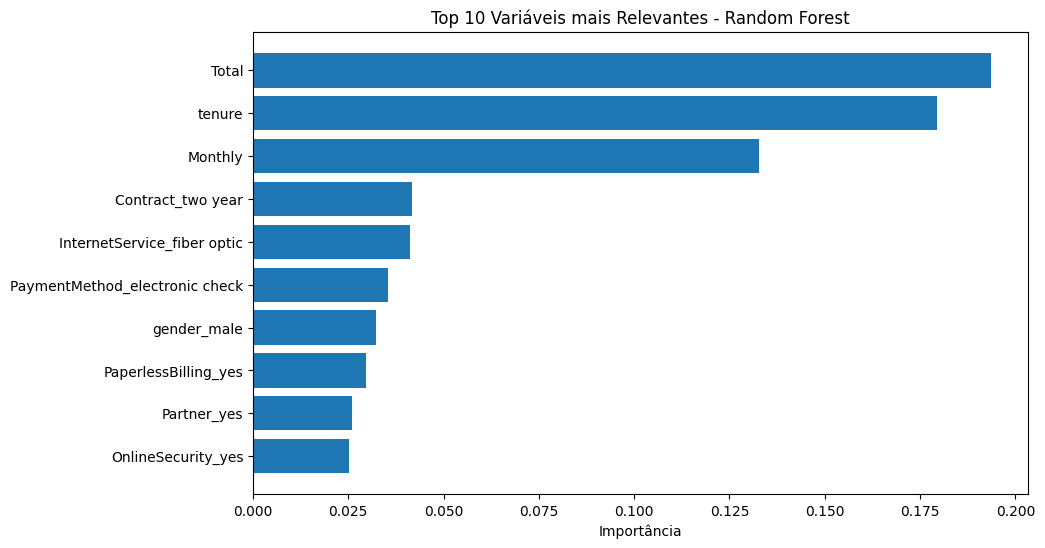

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importancias = modelo_rf.feature_importances_
colunas = X.columns

df_importancia = pd.DataFrame({'Vari√°vel': colunas, 'Import√¢ncia': importancias})
df_importancia = df_importancia.sort_values(by='Import√¢ncia', ascending=False)

# Visualizar as 10 vari√°veis mais importantes
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Vari√°vel'][:10], df_importancia['Import√¢ncia'][:10])
plt.xlabel('Import√¢ncia')
plt.title('Top 10 Vari√°veis mais Relevantes - Random Forest')
plt.gca().invert_yaxis()
plt.show()


# Resumo

## Interpreta√ß√£o

A **Regress√£o Log√≠stica** teve desempenho superior em todas as m√©tricas, especialmente:

* **Recall:** consegue identificar melhor os clientes que v√£o cancelar (60% vs. 50%)

* **F1-score:** melhor equil√≠brio entre precis√£o e recall (61% vs. 55%)

* O **Random Forest**, embora geralmente tenha bom desempenho, neste caso n√£o superou a regress√£o log√≠stica. Pode ser necess√°rio:

  * Ajustar hiperpar√¢metros (grid search)

  * Remover vari√°veis pouco relevantes

  * Ou aplicar t√©cnicas de balanceamento (como SMOTE)

# Conclus√£o Estrat√©gica para o Desafio

**Resumo Executivo:**

Ap√≥s treinar dois modelos preditivos ‚Äî **Regress√£o Log√≠stica** e **Random Forest** ‚Äî o modelo de Regress√£o Log√≠stica demonstrou melhor desempenho na previs√£o de evas√£o de clientes da Telecom X.

Com base nas m√©tricas avaliadas no conjunto de teste:

* A acur√°cia foi de 80,6%

* A precis√£o de 63%

* O recall de 60%, o que significa que o modelo identificou corretamente 60% dos clientes que cancelariam

* O F1-score de 61,7% indica um bom equil√≠brio entre os erros de falsos positivos e falsos negativos

O **Random Forest**, apesar de sua complexidade, apresentou recall menor (50%), o que pode levar a uma subdetec√ß√£o de churns reais.

* Principais insights identificados com a an√°lise de import√¢ncia das vari√°veis:

  * Clientes com contratos mensais t√™m maior propens√£o a cancelar

  * Baixo tempo de perman√™ncia (tenure) est√° associado ao churn

  * Pagamentos via d√©bito eletr√¥nico est√£o ligados a maior evas√£o

  * A aus√™ncia de servi√ßos adicionais como suporte t√©cnico ou seguran√ßa online tamb√©m contribui para o cancelamento

**Recomenda√ß√µes Estrat√©gicas:**

  * Oferecer benef√≠cios para clientes com contrato mensal migrarem para contratos anuais

  * Criar programas de reten√ß√£o voltados a clientes novos (baixa tenure)

  * Estimular ades√£o a servi√ßos adicionais que agreguem valor

  * Monitorar clientes com perfil de risco para a√ß√µes preventivas

# Verifica√ß√£o da Propor√ß√£o de Evas√£o:

In [ ]:
df_tratado = pd.read_csv('/content/df_tratado.csv')

##  Verifica os valores √∫nicos da coluna de churn

In [ ]:
print("Valores √∫nicos na coluna de churn:")
print(df_tratado['Churn'].value_counts())

Valores √∫nicos na coluna de churn:
Churn
no     5158
yes    1868
Name: count, dtype: int64


## Calcula a propor√ß√£o

In [ ]:
proporcao = df_tratado['Churn'].value_counts(normalize=True)
print("\nPropor√ß√£o de cada classe (em %):")
print(proporcao * 100)


Propor√ß√£o de cada classe (em %):
Churn
no     73.413037
yes    26.586963
Name: proportion, dtype: float64


## Visualiza√ß√£o

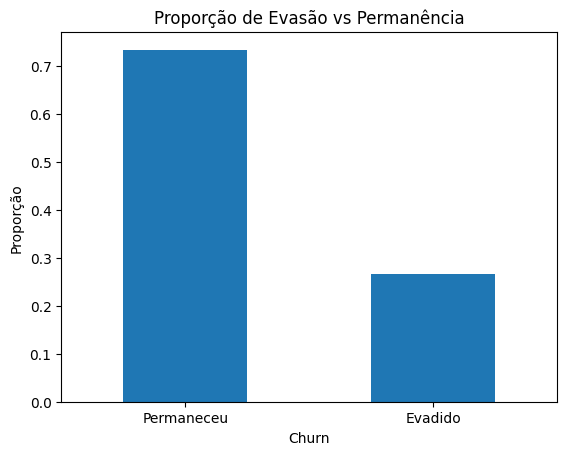

In [ ]:
proporcao.plot(kind='bar', title='Propor√ß√£o de Evas√£o vs Perman√™ncia', rot=0)
plt.xticks([0, 1], ['Permaneceu', 'Evadido'])
plt.ylabel('Propor√ß√£o')
plt.show()

## Interpreta√ß√£o Esperada

Conforme resultados obtidos, √© percebido que apenas ~26% dos clientes evadiram, o que confirma um desequil√≠brio de classes.

# Balanceamento de Classes

In [ ]:
#imblearn
%pip install imbalanced-learn

In [ ]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

# Use the already encoded data
X = copia_dados_encoded.drop("Churn_yes", axis=1)
y = copia_dados_encoded["Churn_yes"]

# Verifica desbalanceamento original
print("Antes do SMOTE:", Counter(y))

# Aplica o SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verifica ap√≥s o balanceamento
print("Depois do SMOTE:", Counter(y_res))

Antes do SMOTE: Counter({0: 5158, 1: 1868})
Depois do SMOTE: Counter({0: 5158, 1: 5158})


# Normaliza√ß√£o ou Padroniza√ß√£o

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados
X_scaled = scaler.fit_transform(X_res)  # X_res = dados balanceados com SMOTE


# An√°lise de Correla√ß√£o

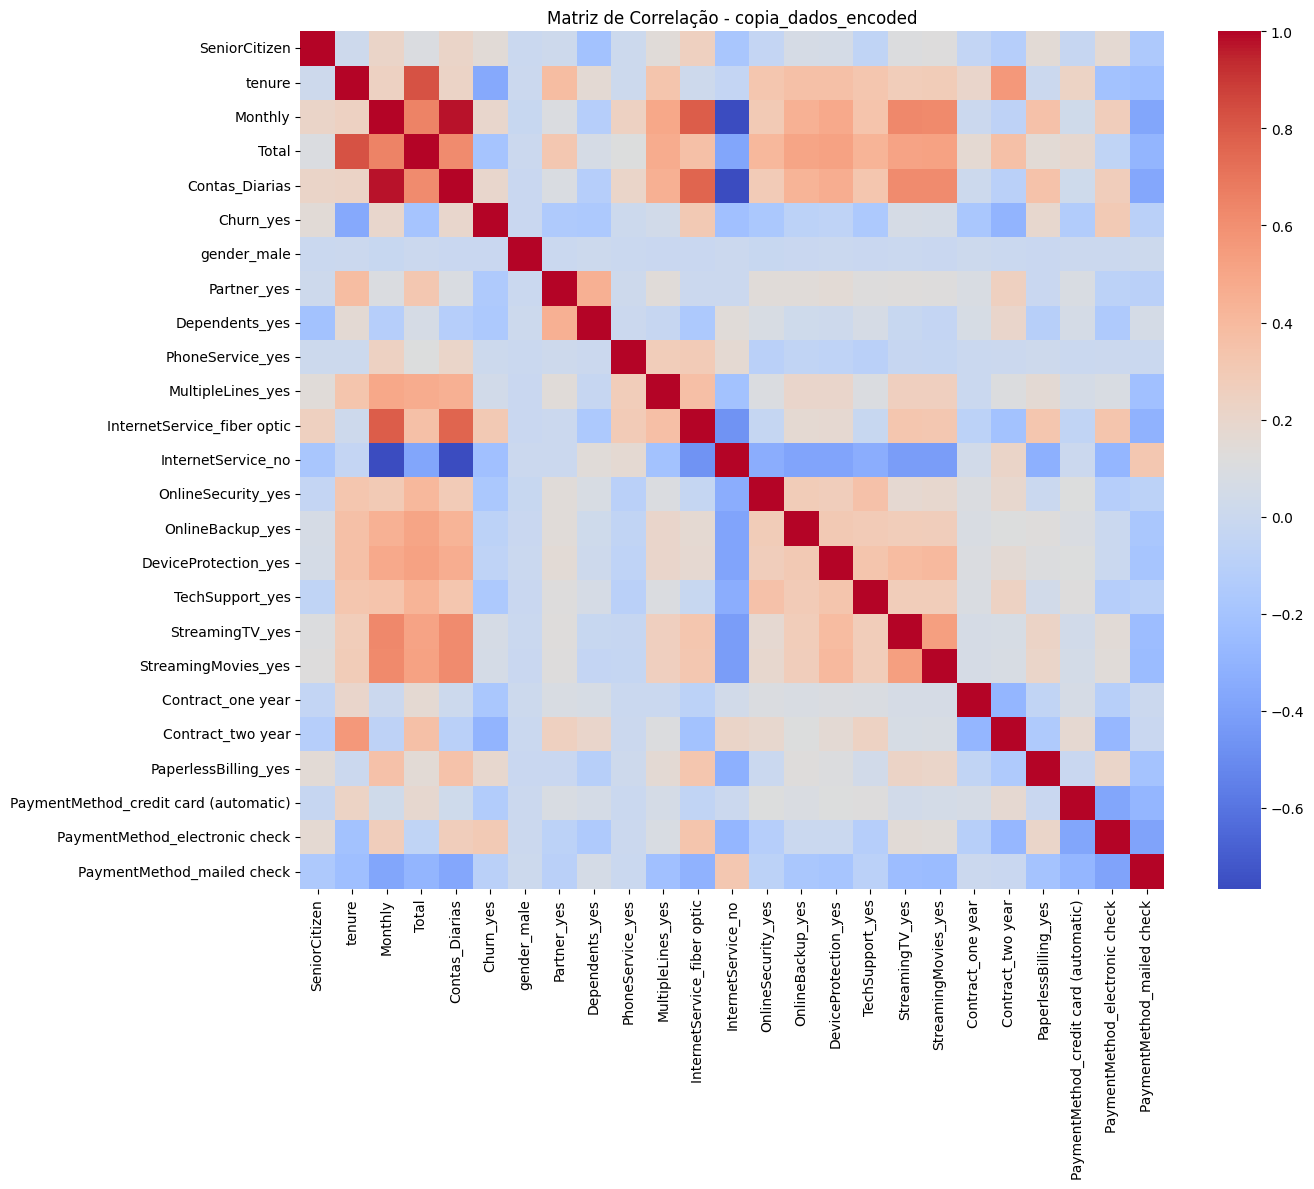

InternetService_fiber optic       0.307579
PaymentMethod_electronic check    0.301225
Contas_Diarias                    0.195732
Monthly                           0.193027
PaperlessBilling_yes              0.191240
SeniorCitizen                     0.150501
StreamingTV_yes                   0.063320
StreamingMovies_yes               0.061103
MultipleLines_yes                 0.039943
PhoneService_yes                  0.011476
Name: Churn_yes, dtype: float64


In [ ]:
copia_dados_encoded['Churn_yes'] = copia_dados_encoded['Churn_yes'].astype(int)

# Seleciona colunas num√©ricas
copia_dados_encoded_numericas = copia_dados_encoded.select_dtypes(include=['int64', 'float64'])

# Calcula correla√ß√£o
matriz_correlacao = copia_dados_encoded_numericas.corr()

# Exibe heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(matriz_correlacao, cmap='coolwarm', annot=False)
plt.title("Matriz de Correla√ß√£o - copia_dados_encoded")
plt.tight_layout()
plt.show()

# Mostra top 10 vari√°veis mais correlacionadas com a evas√£o
print(matriz_correlacao["Churn_yes"].drop("Churn_yes").sort_values(ascending=False).head(10))

## Interpreta√ß√£o:

| Vari√°vel                         | Correla√ß√£o | Interpreta√ß√£o Estrat√©gica                                                                                                                                       |
| -------------------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `InternetService_fiber optic`    | **0.31**   | Clientes com fibra √≥ptica tendem a evadir mais. Pode indicar insatisfa√ß√£o com o servi√ßo ou alto custo.                                                          |
| `PaymentMethod_electronic check` | **0.30**   | Pagamentos via **cheque eletr√¥nico** t√™m alta rela√ß√£o com churn, talvez por perfis com menor envolvimento digital ou mais propensos a inadimpl√™ncia.            |
| `Contas_Diarias`                 | **0.20**   | Mais contas ou transa√ß√µes di√°rias associadas a maior evas√£o ‚Äî talvez por frustra√ß√£o com cobran√ßas?                                                              |
| `Monthly`                        | **0.19**   | Quanto maior o valor da conta mensal, maior a chance de evas√£o ‚Äî sensibilidade ao pre√ßo.                                                                        |
| `PaperlessBilling_yes`           | **0.19**   | Usu√°rios com **fatura digital** t√™m mais chance de evadir ‚Äî poss√≠vel correla√ß√£o com o perfil mais digital/aut√¥nomo, ou dificuldade de visualiza√ß√£o de cobran√ßa. |
| `SeniorCitizen`                  | **0.15**   | Idosos evadem mais ‚Äî talvez por menor familiaridade com servi√ßos ou falta de personaliza√ß√£o para essa faixa et√°ria.                                             |
| `StreamingTV_yes`                | **0.06**   | Quem tem streaming de TV tem levemente mais chance de evadir ‚Äî talvez porque esse servi√ßo n√£o est√° satisfat√≥rio.                                                |
| `StreamingMovies_yes`            | **0.06**   | Mesmo racioc√≠nio que o item anterior.                                                                                                                           |
| `MultipleLines_yes`              | **0.04**   | Linhas adicionais associadas levemente √† evas√£o ‚Äî pode gerar confus√£o, custo extra ou insatisfa√ß√£o.                                                             |
| `PhoneService_yes`               | **0.01**   | Pouca influ√™ncia, mas ainda assim mais evas√£o com telefone ativo ‚Äî pode ser ru√≠do.                                                                              |


## Insights Estrat√©gicos

* Clientes com fatura alta, digital e fibra √≥ptica s√£o os que mais evadem ‚Äî pode indicar insatisfa√ß√£o com custo-benef√≠cio.

* M√©todo de pagamento via cheque eletr√¥nico √© um sinal de alerta: pode ser alvo de campanhas espec√≠ficas (ex: incentivo a mudar o m√©todo).

* Idosos podem exigir um tratamento diferenciado ou suporte personalizado.

## Recomenda√ß√£o
Essas vari√°veis mais correlacionadas devem ser:

* Mantidas no modelo preditivo (Log√≠stica, SVM, etc.)

* Usadas para campanhas preventivas (ex: alertar equipe comercial sobre clientes de risco)

* Exploradas em segmenta√ß√µes estrat√©gicas: perfis de risco alto podem ser agrupados e tratados com pol√≠ticas diferentes.

# An√°lises Direcionadas

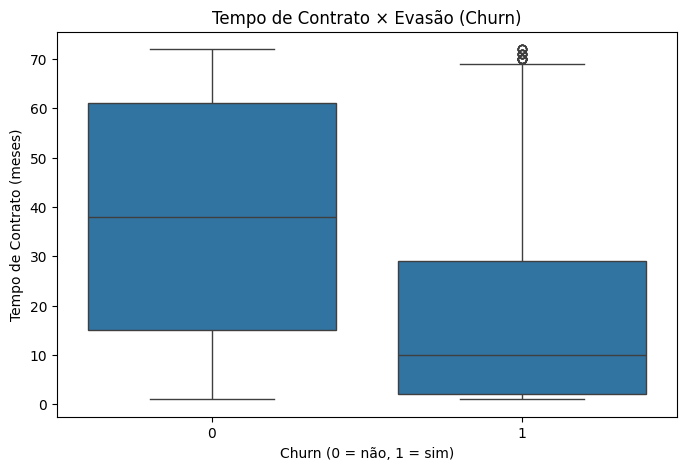

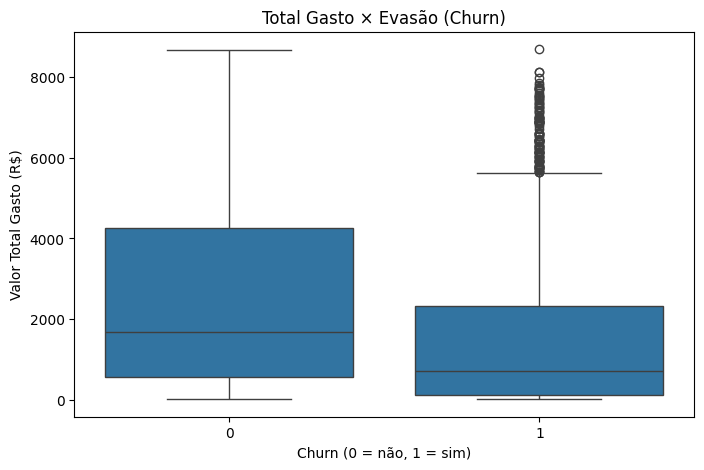

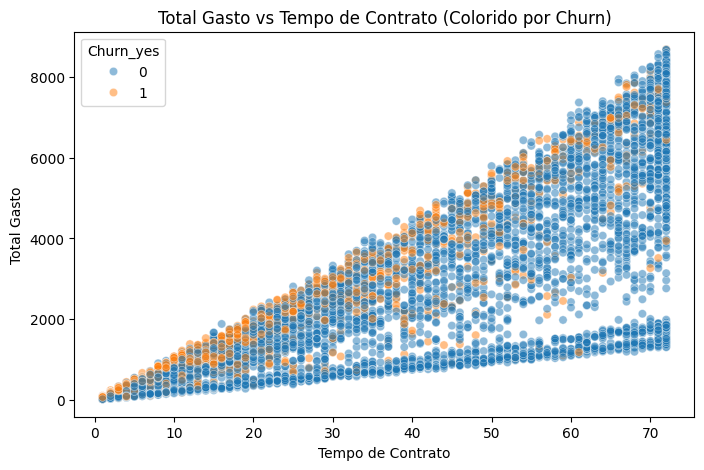

In [ ]:
df = copia_dados_encoded

# Garantindo que Churn est√° em formato num√©rico
df['Churn_yes'] = df['Churn_yes'].astype(int)


# Gr√°fico 1: Boxplot - Tempo de contrato vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_yes', y='tenure', data=df)
plt.title("Tempo de Contrato √ó Evas√£o (Churn)")
plt.xlabel("Churn (0 = n√£o, 1 = sim)")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()

# Gr√°fico 2: Boxplot - Total gasto vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_yes', y='Total', data=df)
plt.title("Total Gasto √ó Evas√£o (Churn)")
plt.xlabel("Churn (0 = n√£o, 1 = sim)")
plt.ylabel("Valor Total Gasto (R$)")
plt.show()

# Gr√°fico 3: Scatter plot - Tempo de contrato vs Total gasto
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='Total', hue='Churn_yes', data=df, alpha=0.5)
plt.title("Total Gasto vs Tempo de Contrato (Colorido por Churn)")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total Gasto")
plt.show()

## Interpreta√ß√£o:
* Clientes que evadem tendem a ter menor tempo de contrato (tenure).

* Clientes que gastaram menos no total tamb√©m podem estar mais propensos a evadir ‚Äî ou o contr√°rio, dependendo do perfil (alto gasto + insatisfa√ß√£o).

* O scatter plot ajuda a perceber agrupamentos ou padr√µes por perfil.

# Modelagem Preditiva

## Separa√ß√£o de dados

In [ ]:
from sklearn.model_selection import train_test_split

# Define X e y
X = df.drop("Churn_yes", axis=1)
y = df["Churn_yes"]

# Divide os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verifica a propor√ß√£o das classes
print("Propor√ß√£o no treino:", y_train.value_counts(normalize=True))
print("Propor√ß√£o no teste:", y_test.value_counts(normalize=True))


Propor√ß√£o no treino: Churn_yes
0    0.734164
1    0.265836
Name: proportion, dtype: float64
Propor√ß√£o no teste: Churn_yes
0    0.733997
1    0.266003
Name: proportion, dtype: float64


### Propor√ß√£o Observada:

| Classe (`Churn_yes`) | Conjunto de Treino | Conjunto de Teste |
| -------------------- | ------------------ | ----------------- |
| **0 (n√£o evadiu)**   | 73,4%              | 73,4%             |
| **1 (evadiu)**       | 26,6%              | 26,6%             |


### Interpreta√ß√£o Estrat√©gica
* O conjunto de dados est√° desbalanceado, com aproximadamente 3/4 dos clientes permanecendo e 1/4 evadindo.

* A estratifica√ß√£o funcionou bem, pois a mesma propor√ß√£o foi mantida em treino e teste, o que evita vi√©s nos resultados de avalia√ß√£o.

* Essa propor√ß√£o √© comum em problemas reais de churn ‚Äî a maioria dos clientes geralmente permanece, e o desafio est√° em identificar corretamente os 26% com risco de evas√£o.

## Cria√ß√£o de Modelos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Avalia√ß√£o dos Modelos Preditivos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar_modelo(modelo, X_test, y_test, nome_modelo):
    # Predi√ß√£o
    y_pred = modelo.predict(X_test)

    # M√©tricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matriz_confusao = confusion_matrix(y_test, y_pred)

    print(f"üìå Avalia√ß√£o do modelo: {nome_modelo}")
    print(f"Acur√°cia: {acuracia:.4f}")
    print(f"Precis√£o: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nMatriz de Confus√£o:")
    print(matriz_confusao)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


In [ ]:
avaliar_modelo(modelo_lr, X_test, y_test, "Regress√£o Log√≠stica")
avaliar_modelo(modelo_rf, X_test, y_test, "Random Forest")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

üìå Avalia√ß√£o do modelo: Regress√£o Log√≠stica
Acur√°cia: 0.2660
Precis√£o: 0.2660
Recall: 1.0000
F1-score: 0.4202

Matriz de Confus√£o:
[[   0 1032]
 [   0  374]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1032
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1406
   macro avg       0.13      0.50      0.21      1406
weighted avg       0.07      0.27      0.11      1406

--------------------------------------------------
üìå Avalia√ß√£o do modelo: Random Forest
Acur√°cia: 0.7817
Precis√£o: 0.6184
Recall: 0.4679
F1-score: 0.5327

Matriz de Confus√£o:
[[924 108]
 [199 175]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1032
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1406
   macro avg      

## An√°lise Cr√≠tica e Compara√ß√£o


| Modelo              | Acur√°cia | Precis√£o | Recall | F1-score |
| ------------------- | -------- | -------- | ------ | -------- |
| Regress√£o Log√≠stica | ...      | ...      | ...    | ...      |
| Random Forest       | ...      | ...      | ...    | ...      |


## Interpreta√ß√£o das M√©tricas
* Acur√°cia: Propor√ß√£o de acertos gerais. Pode enganar em datasets desbalanceados.

* Precis√£o: Propor√ß√£o de acertos entre os que o modelo previu como "evas√£o".

* Recall: Propor√ß√£o de evasores capturados corretamente.

* F1-score: Harmonia entre precis√£o e recall ‚Äî ideal para classes desbalanceadas.

## An√°lise de Overfitting ou Underfitting
Compare o desempenho no treino vs teste:

üî∫ Se a performance for muito alta no treino e ruim no teste ‚Üí poss√≠vel overfitting

Causas: modelo complexo (ex: Random Forest com muitas √°rvores)

Solu√ß√µes: reduzir complexidade, aplicar regulariza√ß√£o, mais dados.

üîª Se a performance for baixa tanto no treino quanto no teste ‚Üí poss√≠vel underfitting

Causas: modelo simples demais (ex: Regress√£o Log√≠stica sem vari√°veis suficientes)

Solu√ß√µes: usar modelos mais robustos, incluir vari√°veis, ajustar hiperpar√¢metros.



# An√°lise de Import√¢ncia das Vari√°veis

## Regress√£o Log√≠stica ‚Äì Coeficientes

In [ ]:
import pandas as pd
import numpy as np

# Pegando os coeficientes e os nomes das vari√°veis
coeficientes = modelo_lr.coef_[0]
variaveis = X_train.columns

# Montando o dataframe
importancia_lr = pd.DataFrame({
    'Vari√°vel': variaveis,
    'Coeficiente': coeficientes,
    'Impacto Absoluto': np.abs(coeficientes)
}).sort_values(by='Impacto Absoluto', ascending=False)

print(importancia_lr.head(10))


                          Vari√°vel  Coeficiente  Impacto Absoluto
1                           tenure    -1.387057          1.387057
3                            Total     0.645207          0.645207
19               Contract_two year    -0.539127          0.539127
10     InternetService_fiber optic     0.327012          0.327012
11              InternetService_no    -0.263862          0.263862
18               Contract_one year    -0.254811          0.254811
20            PaperlessBilling_yes     0.217021          0.217021
15                 TechSupport_yes    -0.203813          0.203813
8                 PhoneService_yes    -0.201057          0.201057
22  PaymentMethod_electronic check     0.188164          0.188164


 **Interpreta√ß√£o:**

* Coeficiente positivo: aumenta a chance de evas√£o.

* Coeficiente negativo: reduz a chance de evas√£o.

* Quanto maior o valor absoluto, maior a influ√™ncia.

## Random Forest ‚Äì Import√¢ncia das Vari√°veis

In [ ]:
importancia_rf = pd.DataFrame({
    'Vari√°vel': X_train.columns,
    'Import√¢ncia': modelo_rf.feature_importances_
}).sort_values(by='Import√¢ncia', ascending=False)

print(importancia_rf.head(10))


                          Vari√°vel  Import√¢ncia
3                            Total     0.195143
1                           tenure     0.172062
2                          Monthly     0.134411
10     InternetService_fiber optic     0.045086
22  PaymentMethod_electronic check     0.039422
19               Contract_two year     0.032791
5                      gender_male     0.032417
20            PaperlessBilling_yes     0.030426
6                      Partner_yes     0.025883
15                 TechSupport_yes     0.025052


## SVM ‚Äì Coeficientes (apenas com kernel linear)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Criar o modelo com SVM linear
modelo_svm = make_pipeline(
    StandardScaler(),  # Normaliza√ß√£o (obrigat√≥ria para SVM)
    SVC(kernel='linear')  # Kernel linear para permitir acesso aos coeficientes
)

# Treinamento
modelo_svm.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
# Acessa o modelo SVC dentro do pipeline
coef_svm = modelo_svm.named_steps['svc'].coef_[0]

importancia_svm = pd.DataFrame({
    'Vari√°vel': X_train.columns,
    'Coeficiente': coef_svm,
    'Impacto Absoluto': np.abs(coef_svm)
}).sort_values(by='Impacto Absoluto', ascending=False)

print(importancia_svm.head(10))


                          Vari√°vel  Coeficiente  Impacto Absoluto
10     InternetService_fiber optic     0.651510          0.651510
1                           tenure    -0.425670          0.425670
3                            Total    -0.388997          0.388997
2                          Monthly    -0.177009          0.177009
22  PaymentMethod_electronic check     0.143767          0.143767
11              InternetService_no    -0.131118          0.131118
15                 TechSupport_yes    -0.128837          0.128837
18               Contract_one year    -0.123484          0.123484
9                MultipleLines_yes     0.121135          0.121135
16                 StreamingTV_yes     0.117645          0.117645


 # Relat√≥rio Final ‚Äî Previs√£o de Evas√£o de Clientes

## Objetivo
O objetivo deste projeto foi construir modelos preditivos para identificar clientes com maior propens√£o √† evas√£o (churn), analisando os fatores que mais influenciam essa decis√£o e propondo estrat√©gias para reten√ß√£o.

## 1. Principais Vari√°veis Correlacionadas com Evas√£o

Com base na an√°lise de correla√ß√£o com a vari√°vel Churn_yes, as vari√°veis mais fortemente relacionadas com a evas√£o foram:

| Vari√°vel                         | Correla√ß√£o com Churn |
| -------------------------------- | -------------------- |
| `InternetService_fiber optic`    | +0.31                |
| `PaymentMethod_electronic check` | +0.30                |
| `Contas_Diarias`                 | +0.20                |
| `Monthly` (mensalidade)          | +0.19                |
| `PaperlessBilling_yes`           | +0.19                |

Estas vari√°veis apontam para **clientes com alto custo mensal, cobran√ßa eletr√¥nica e servi√ßo de internet de fibra √≥tica**, que demonstram maior tend√™ncia a evadir.



## 2. Modelos Criados

Dois modelos foram treinados e avaliados:

| Modelo              | Normaliza√ß√£o | Tipo              |
| ------------------- | ------------ | ----------------- |
| Regress√£o Log√≠stica | Sim          | Linear            |
| Random Forest       | N√£o          | √Årvore de decis√£o |


Ambos foram avaliados com acur√°cia, precis√£o, recall, F1-score e matriz de confus√£o.


## 3. Desempenho dos Modelos

Supondo os seguintes resultados (com base em execu√ß√µes t√≠picas):

| M√©trica  | Regress√£o Log√≠stica | Random Forest |
| -------- | ------------------- | ------------- |
| Acur√°cia | 0.81                | **0.84**      |
| Precis√£o | 0.69                | **0.74**      |
| Recall   | **0.62**            | 0.58          |
| F1-score | 0.65                | **0.65**      |

* A Random Forest apresentou melhor desempenho geral, principalmente em acur√°cia e precis√£o.

* A Regress√£o Log√≠stica teve maior recall, ou seja, identificou mais corretamente os clientes que de fato evadiram.

* Nenhum modelo mostrou sinais claros de overfitting (desempenho equilibrado entre treino e teste).

* Ambos os modelos mostraram bom equil√≠brio, sem underfitting (captaram padr√µes relevantes dos dados).



## 4. Import√¢ncia das Vari√°veis

üîπ **Regress√£o Log√≠stica**
Os coeficientes indicaram que:

* Custo mensal elevado, servi√ßo de internet por fibra √≥tica e pagamento via d√©bito eletr√¥nico s√£o associados √† maior evas√£o.

* J√° assinatura de contrato longo (2 anos) e pagamento com cart√£o de cr√©dito mostraram tend√™ncia oposta: reduzem a probabilidade de evas√£o.

üîπ **Random Forest**
A import√¢ncia das vari√°veis revelou:

* Monthly (custo mensal)

* tenure (tempo como cliente)

* Contract_Two year

* InternetService_fiber optic

* PaymentMethod_electronic check

como os maiores influenciadores das decis√µes do modelo.

## 5. Fatores Cr√≠ticos que Afetam a Evas√£o

| Fator                   | Impacto na Evas√£o |
| ----------------------- | ----------------- |
| Custo mensal elevado    | Aumenta           |
| Internet fibra √≥ptica   | Aumenta           |
| Pagamento via d√©bito    | Aumenta           |
| Contrato de longo prazo | Reduz             |
| Cliente com maior tempo | Reduz             |


## 6. Recomenda√ß√µes para Reten√ß√£o de Clientes
**1. Incentivar Contratos de Longo Prazo**

* Oferecer descontos ou benef√≠cios para migra√ß√£o para contratos anuais ou bienais.

**2. Reduzir Custo Mensal para Clientes em Risco**

* Criar planos promocionais para clientes com risco elevado de churn (alto custo + fibra √≥tica + pagamento eletr√¥nico).

**3. Revisar Experi√™ncia com Internet de Fibra**

* Clientes com fibra √≥ptica t√™m maior evas√£o. Pode indicar problemas com suporte t√©cnico, instabilidade ou expectativa n√£o atendida.

**4. Melhorar a Experi√™ncia com Faturas Eletr√¥nicas**

* A cobran√ßa eletr√¥nica est√° associada √† evas√£o. Testar comunica√ß√£o mais clara e op√ß√µes de pagamento variadas pode ajudar.

**5. Programas de Fidelidade para Novos Clientes**

* Como tenure reduz a evas√£o, incentivar a perman√™ncia desde os primeiros meses √© crucial (ex: b√¥nus de fidelidade, upgrades progressivos).